In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lp_predict=pd.read_csv('laptop_data.csv')

In [3]:
lp_predict.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [4]:
lp_predict.shape

(1303, 12)

In [5]:
lp_predict.info()     #to get info about the coloumns and its datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
lp_predict.duplicated().sum()   #to check whether any 2 rows are identical or not

0

In [7]:
lp_predict.isnull().sum()       #to check whether there is any null value or not

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# the drop method in pandas will return a new dataframe as default with a specified column drop-here direct modification of dataframe is required without any new dataframe
# thus inplace=true argument is used
lp_predict.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
lp_predict.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [10]:
#to remove 'gb' from 'ram' and 'kg' from 'weight' 
lp_predict['Ram']=lp_predict['Ram'].str.replace('GB','')

In [11]:
lp_predict['Weight']=lp_predict['Weight'].str.replace('kg','')

In [12]:
lp_predict.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1,21312.0000
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3,79653.6000
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6,41025.6000


In [13]:
# still Ram and Weight is object so it need to be changed
# thus astype is used for type conversion of columns in dataframe
lp_predict['Ram']=lp_predict['Ram'].astype('int32')
lp_predict['Weight']=lp_predict['Weight'].astype('float32') 

In [14]:
lp_predict.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Anayisis
# univariate and bivariate 

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


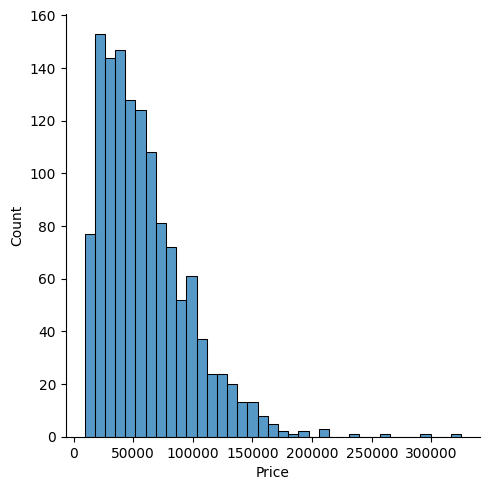

In [15]:
#univariate analysis on price 
sns.displot(lp_predict['Price']) 

<Axes: xlabel='Company'>

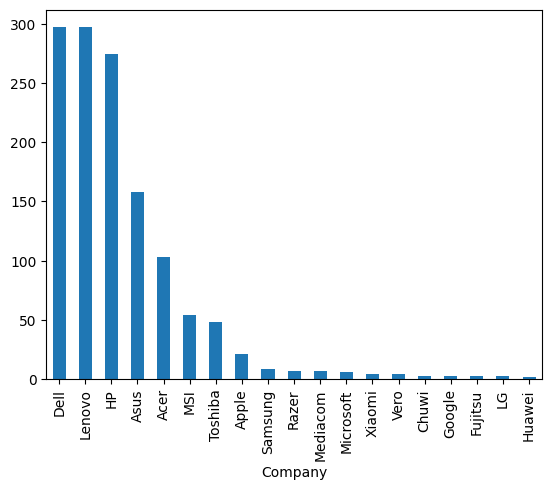

In [16]:
# to check the number of laptops for different company using bar charts
#value_counts() is ysed to understand the distribution of values in a column
lp_predict['Company'].value_counts().plot(kind='bar')  

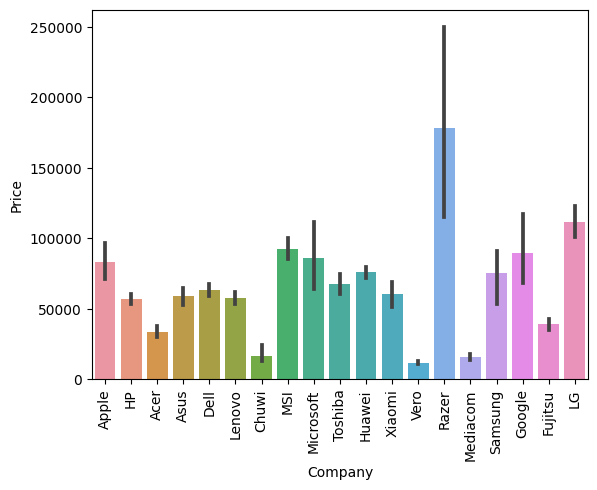

In [17]:
#average price for each company
#the chart above affects the price i.e. the company name can affect the price
# X axis shows company's name and Y axis shows price
sns.barplot(x=lp_predict['Company'], y=lp_predict['Price'])
#to show names on x axis as vertical so as to avoid overlapping of names
plt.xticks(rotation='vertical')   #matplotlib 
plt.show() 

<Axes: ylabel='count'>

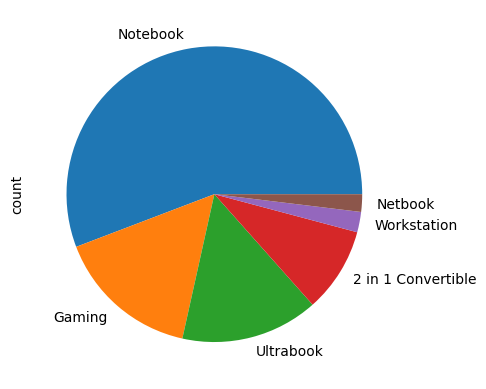

In [18]:
# types of laptops in dataset
lp_predict['TypeName'].value_counts().plot(kind='pie') 

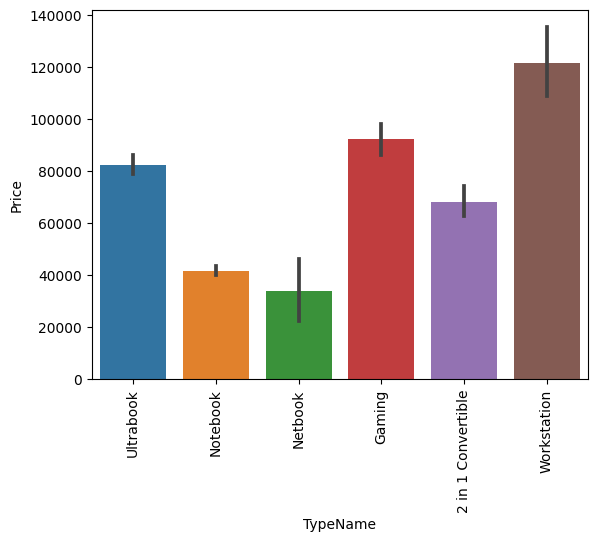

In [19]:
#check average price for each type of laptops
sns.barplot(x=lp_predict['TypeName'], y=lp_predict['Price'])
plt.xticks(rotation='vertical')  
plt.show() 

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


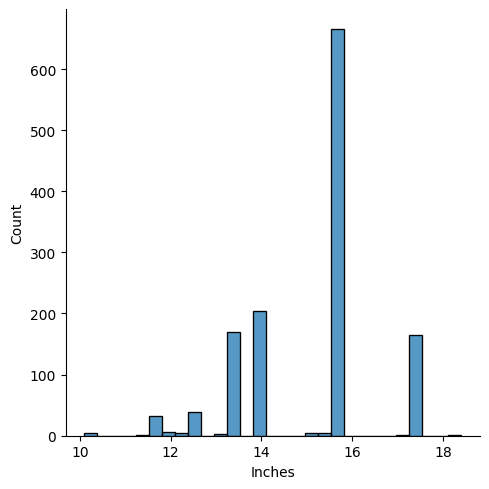

In [20]:
#analysis size column
sns.displot(lp_predict['Inches']) 

<Axes: xlabel='Inches', ylabel='Price'>

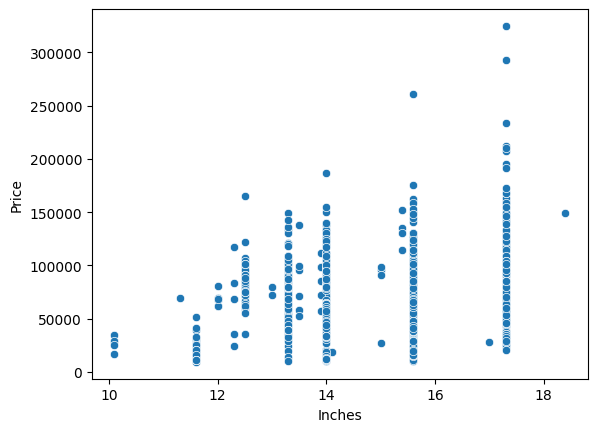

In [21]:
#lets try scatterplot for knowing variation between price and inches
#there's weak correlation between price and size of laptops
sns.scatterplot(x=lp_predict['Inches'], y=lp_predict['Price']) 

In [22]:
#lets check the values counts in screenresolution column
#the common feature here is only the screenresolution range
lp_predict['ScreenResolution'].value_counts() 

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

# Applying Feature Engineering
# selecting, extracting, and transforming the most relevant features from the available dataset

In [23]:
#lambda is the inline and unnamed funct in python
#here x is an individual element from the ScreenResolution column
#if 'Touchscreen' is a substring of x then function returns 1; otherwise, it returns 0.
lp_predict['Touchscreen'] = lp_predict['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
lp_predict.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1178,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,1.91,114731.5536,0
520,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,74538.7200,0
163,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,57489.1200,0
614,Dell,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,4,500GB HDD,Intel HD Graphics 620,Linux,1.93,46300.3200,0
826,Asus,2 in 1 Convertible,13.3,Touchscreen / Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,72354.2400,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0
1007,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,77202.7200,0
165,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.40,95850.7200,0
754,Asus,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.37,45282.6720,0
608,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.00,69210.7200,1


<Axes: xlabel='Touchscreen'>

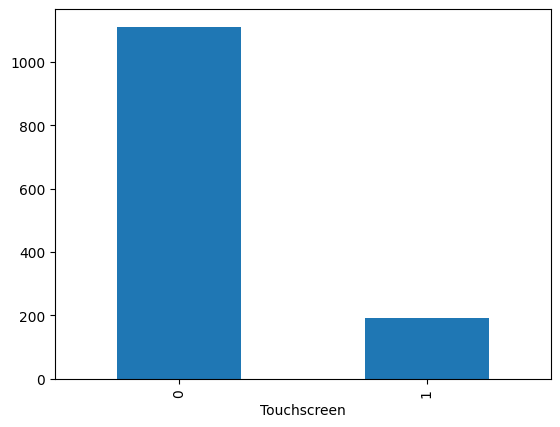

In [25]:
#lets count the numbers of touchscreen laptops
lp_predict['Touchscreen'].value_counts().plot(kind='bar') 

<Axes: xlabel='Touchscreen', ylabel='Price'>

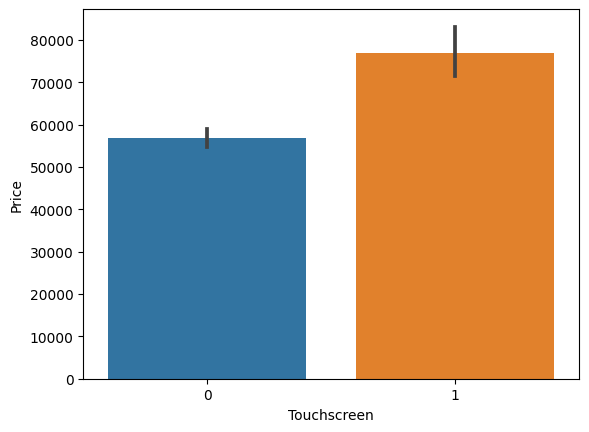

In [26]:
sns.barplot(x=lp_predict['Touchscreen'], y=lp_predict['Price']) 

In [27]:
#create a new colunm for checking whether the laptops have ips panel or not
lp_predict['IPS'] = lp_predict['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
lp_predict.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
1150,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.90,18061.9200,0,0
1050,Lenovo,Notebook,14.0,IPS Panel 2560x1440,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Intel HD Graphics 520,Windows 7,1.10,139593.6000,0,1
992,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,128GB SSD,Intel HD Graphics 500,No OS,1.90,14418.6336,0,0
765,Acer,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.60,34898.4000,0,0
225,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.20,44328.9600,0,0
828,Acer,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35,18914.4000,0,1
1205,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36,47365.9200,0,0
449,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,137941.9200,1,0
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0,0
126,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.63,43263.3600,0,0


<Axes: xlabel='IPS'>

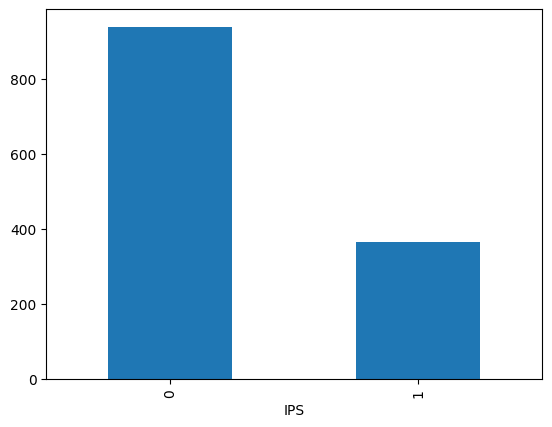

In [29]:
#lets count the numbers of ips laptops
lp_predict['IPS'].value_counts().plot(kind='bar') 

<Axes: xlabel='IPS', ylabel='Price'>

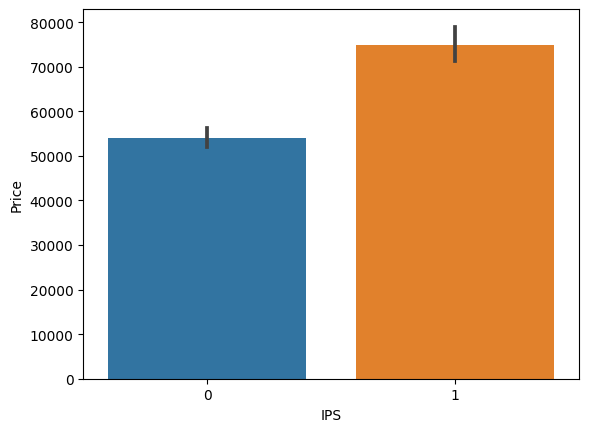

In [30]:
sns.barplot(x=lp_predict['IPS'], y=lp_predict['Price']) 

In [31]:
#to definr x resolution and y resolution
#The string will be split at the first occurrence of the character 'x'.
#n=1 indicates that only one split should be done (so if a string has multiple occurrences of 'x', only the first one will be used to split the string).
#expand=True means that the split strings should be expanded into separate columns. If expand=False (the default), then each split string would be returned as a list
lp_predict['ScreenResolution'].str.split('x', n=1, expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [32]:
res=lp_predict['ScreenResolution'].str.split('x', n=1, expand=True)

In [33]:
#res[0]: Represents the first part of the split result, which, in the context of screen resolutions, would be the width or X resolution.
#res[1]: Represents the second part of the split result, which would be the height or Y resolution
lp_predict['X_res']=res[0]
lp_predict['Y_res']=res[1]

In [34]:
lp_predict.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1203,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.20,142790.4000,1,0,Quad HD+ / Touchscreen 3200,1800
1005,HP,Notebook,14.0,1366x768,Intel Core i5 6300U 2.4GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,58607.4672,0,0,1366,768
889,Lenovo,Notebook,17.3,1600x900,AMD A4-Series 7210 2.2GHz,4,500GB HDD,AMD Radeon R3,Windows 10,2.80,20193.1200,0,0,1600,900
38,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,26037.4032,0,0,1366,768
758,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,152859.7872,0,1,IPS Panel 4K Ultra HD 3840,2160
625,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,47898.7200,0,0,Full HD 1920,1080
25,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.30,22305.1392,0,0,1366,768
658,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960,Windows 10,3.31,63722.8800,0,1,IPS Panel Full HD 1920,1080
385,Lenovo,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.13,121584.9600,0,1,IPS Panel 2560,1440
854,Asus,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce GTX 930MX,Windows 10,2.30,41931.3600,0,1,IPS Panel Full HD 1920,1080


In [35]:
#y_res is correct
#x_res should be modified using regular expression
#str.findall() method to find all matches of the regular expression pattern within each string of the X_res column.
#in Python strings, the backslash is also an escape character, thus to avoid confusion raw strings is used i.e. r'
#the regular expression will find all numbers (integers or floats) in each string of the X_res column.
#the lambda func will extract first matches of regex 
lp_predict['X_res']=lp_predict['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


In [36]:
lp_predict.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,1366,768
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,2880,1800
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1440,900
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,1920,1080


In [37]:
lp_predict['X_res']=lp_predict['X_res'].astype('int')
lp_predict['Y_res']=lp_predict['Y_res'].astype('int')

In [38]:
lp_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [39]:
#pixels per inches(ppi)=diagonal resolutions(pixels)/diagonal size(inches)
#diagonal resolution=[(X_res)^2+(Y_res)^3]^0.5
lp_predict['ppi']=(((lp_predict['X_res']**2)+(lp_predict['Y_res']**2))**0.5/lp_predict['Inches']).astype('float')

In [40]:
lp_predict.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64

In [41]:
if 'ScreenResolution' in lp_predict.columns:
    lp_predict.drop(columns=['ScreenResolution'], inplace=True)

lp_predict.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [42]:
lp_predict.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
236,Acer,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.10,20779.20,0,0,100.454670
745,Acer,Notebook,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.68,17582.40,0,0,111.935204
676,Asus,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,60472.80,0,0,157.350512
295,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,69210.72,0,1,141.211998
318,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,52214.40,0,0,157.350512
607,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,30049.92,0,0,141.211998
421,Chuwi,Notebook,Intel Celeron Quad Core N3450 1.1GHz,6,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.40,23922.72,0,1,267.338436
485,Lenovo,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75,55890.72,0,1,157.350512
845,Dell,Notebook,Intel Core i7 7500U 2.7GHz,4,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,39373.92,0,0,141.211998
1113,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.16,104908.32,0,0,165.632118


In [43]:
lp_predict['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [44]:
#split[0:3] means to split the string and extract firsst 3 items
#" ".join(...): This takes the resulting list of up to three substrings and joins them back into a single string, but with two spaces (" ") between each word
lp_predict['Cpu Name']=lp_predict['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [45]:
lp_predict.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
521,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,74538.7200,0,1,165.632118,Intel Core i7
528,Dell,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon R5 M430,Windows 10,2.30,31168.8000,0,0,141.211998,Intel Core i5
77,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02,45554.4000,0,0,141.211998,Intel Core i7
345,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,60153.1200,0,1,141.211998,Intel Core i7
1286,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual
274,Toshiba,Notebook,Intel Core i7 6500U 2.5GHz,8,500GB HDD,Nvidia GeForce 930M,Windows 10,2.20,43263.3600,0,0,100.454670,Intel Core i7
378,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15238.0800,0,0,111.935204,Intel Celeron Dual
275,Dell,Notebook,Intel Core i7 7500U 2.7GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,37992.3696,0,0,100.454670,Intel Core i7
729,HP,Notebook,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon 520,Windows 10,2.10,26053.9200,0,0,141.211998,AMD A9-Series 9420
284,Acer,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,50669.2800,0,1,141.211998,Intel Core i7


In [46]:
#a func name fetch_precessor is defined to identify the processor 
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [47]:
lp_predict['Cpu Brand']=lp_predict['Cpu Name'].apply(fetch_processor)

In [48]:
lp_predict.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu Brand
1129,HP,Gaming,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,60153.1200,0,1,127.335675,Intel Core i5,Intel Core i5
67,HP,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,32GB SSD,Intel HD Graphics 400,Windows 10,1.44,12201.1200,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
1010,Dell,Gaming,Intel Core i5 7300HQ 2.5GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.65,50562.7200,0,0,141.211998,Intel Core i5,Intel Core i5
1024,Dell,Notebook,Intel Core i5 6300U 2.4GHz,8,500GB HDD,Intel HD Graphics 520,Windows 10,2.09,55754.3232,0,0,141.211998,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
165,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.40,95850.7200,0,1,141.211998,Intel Core i7,Intel Core i7
547,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.15,24634.0080,0,0,141.211998,Intel Core i5,Intel Core i5
1145,HP,Workstation,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.00,101178.7200,0,0,141.211998,Intel Core i7,Intel Core i7
385,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.13,121584.9600,0,1,209.800683,Intel Core i7,Intel Core i7
243,Dell,Gaming,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,46833.1200,0,0,141.211998,Intel Core i5,Intel Core i5


<Axes: ylabel='count'>

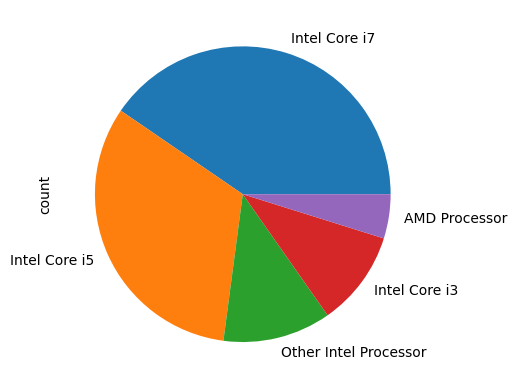

In [49]:
lp_predict['Cpu Brand'].value_counts().plot(kind='pie')

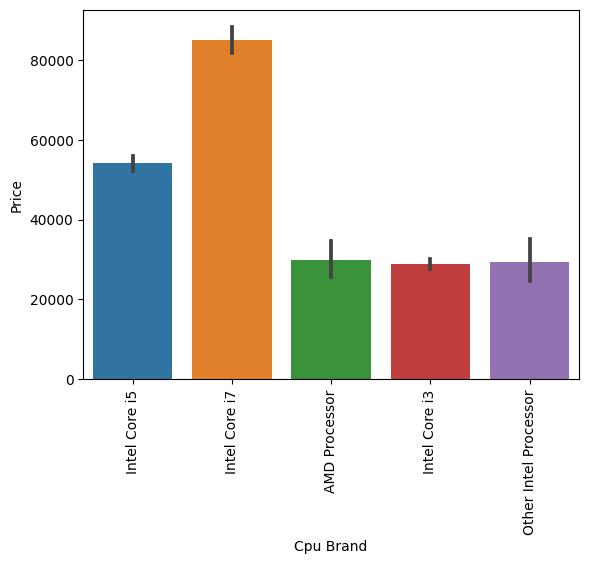

In [50]:
sns.barplot(x=lp_predict['Cpu Brand'], y=lp_predict['Price']) 
plt.xticks(rotation= 'vertical')
plt.show()

In [51]:
lp_predict.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [52]:
lp_predict.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand
28,Dell,Ultrabook,8,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,69157.4400,0,0,141.211998,Intel Core i7
1150,Lenovo,Notebook,4,1TB HDD,Intel HD Graphics 520,No OS,1.90,18061.9200,0,0,100.454670,Intel Core i3
706,Acer,2 in 1 Convertible,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,53226.7200,1,1,165.632118,Intel Core i5
244,Lenovo,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,57489.1200,1,1,158.482530,Intel Core i7
871,Lenovo,Notebook,4,1TB HDD,AMD Radeon R5 M430,No OS,2.20,25521.1200,0,0,141.211998,Intel Core i3
1135,Lenovo,Notebook,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,58554.7200,0,0,141.211998,Intel Core i7
908,Lenovo,Notebook,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,42037.9200,0,1,141.211998,Intel Core i5
39,HP,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.10,46833.1200,0,0,141.211998,Intel Core i5
913,HP,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,54291.7872,0,0,141.211998,Intel Core i7
63,Asus,Notebook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.40,50136.4800,0,0,157.350512,Intel Core i5


<Axes: xlabel='Ram'>

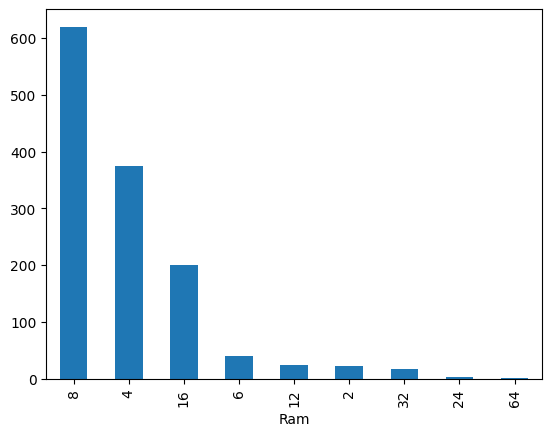

In [53]:
lp_predict['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

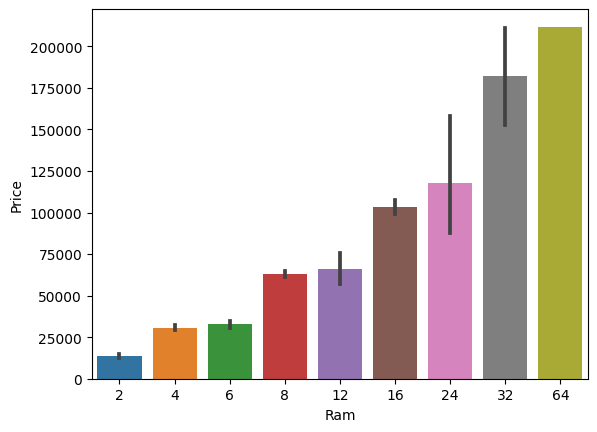

In [54]:
sns.barplot(x=lp_predict['Ram'],y=lp_predict['Price'])

In [55]:
lp_predict['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [56]:
# if you had a Series with a string representation of floating point numbers like ['1.0', '2.5', '3.0'], after applying this replace function, the Series would become ['1', '2.5', '3'].
lp_predict['Memory'] = lp_predict['Memory'].astype(str).replace('\.0', '', regex=True)
lp_predict["Memory"] = lp_predict["Memory"].str.replace('GB', '')
lp_predict["Memory"] = lp_predict["Memory"].str.replace('TB', '000') #1TG=1000GB
new = lp_predict["Memory"].str.split("+", n = 1, expand = True)   #string will be spilt from '+'

lp_predict["first"]= new[0]  #left side of '+'
lp_predict["first"]=lp_predict["first"].str.strip() #strip() func is used to remove space

lp_predict["second"]= new[1]   #right side of '+'

lp_predict["Layer1HDD"] = lp_predict["first"].apply(lambda x: 1 if "HDD" in x else 0)
lp_predict["Layer1SSD"] = lp_predict["first"].apply(lambda x: 1 if "SSD" in x else 0)
lp_predict["Layer1Hybrid"] = lp_predict["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
lp_predict["Layer1Flash_Storage"] = lp_predict["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

lp_predict['first'] = lp_predict['first'].str.replace(r'\D', '')   #\D (matches any non-digit character) will be replaced by empty space

lp_predict["second"].fillna("0", inplace = True) #any missing value (NaN) will be replaced with the string "0", and the changes will be made directly to the lp_predict DataFrame due to inplace=True.

lp_predict["Layer2HDD"] = lp_predict["second"].apply(lambda x: 1 if "HDD" in x else 0)
lp_predict["Layer2SSD"] = lp_predict["second"].apply(lambda x: 1 if "SSD" in x else 0)
lp_predict["Layer2Hybrid"] = lp_predict["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
lp_predict["Layer2Flash_Storage"] = lp_predict["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

lp_predict['second'] = lp_predict['second'].str.replace(r'\D', '')

lp_predict["first"] = lp_predict["first"].str.extract('(\d+)').astype(int)   #extract sequences of digits from a string. If there are multiple sequences of digits, only the first sequence will be extracted.
lp_predict["second"] = lp_predict["second"].str.extract('(\d+)').astype(int)


lp_predict["HDD"]=(lp_predict["first"]*lp_predict["Layer1HDD"]+lp_predict["second"]*lp_predict["Layer2HDD"])
lp_predict["SSD"]=(lp_predict["first"]*lp_predict["Layer1SSD"]+lp_predict["second"]*lp_predict["Layer2SSD"])
lp_predict["Hybrid"]=(lp_predict["first"]*lp_predict["Layer1Hybrid"]+lp_predict["second"]*lp_predict["Layer2Hybrid"])
lp_predict["Flash_Storage"]=(lp_predict["first"]*lp_predict["Layer1Flash_Storage"]+lp_predict["second"]*lp_predict["Layer2Flash_Storage"])

lp_predict.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid','Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                         'Layer2Flash_Storage'],inplace=True)

In [57]:
lp_predict.sample(15)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
1276,Dell,Notebook,6,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,0,100.454670,Intel Core i3,1000,0,0,0
797,Dell,Notebook,8,128 SSD,Intel HD Graphics 620,Windows 10,1.95,43156.8000,0,0,100.454670,Intel Core i5,0,128,0,0
1230,Lenovo,Netbook,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,87912.0000,1,1,176.232574,Intel Core i7,0,512,0,0
579,Dell,Notebook,8,256 SSD,AMD Radeon R5 M430,Linux,2.20,39907.2528,0,0,141.211998,Intel Core i7,0,256,0,0
996,HP,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.11,71874.7200,1,1,165.632118,Intel Core i7,0,256,0,0
683,HP,Notebook,4,256 SSD,AMD Radeon R5 520,Windows 10,2.50,37242.7200,0,1,127.335675,Intel Core i3,0,256,0,0
854,Asus,Notebook,8,256 SSD,Nvidia GeForce GTX 930MX,Windows 10,2.30,41931.3600,0,1,141.211998,Intel Core i7,0,256,0,0
637,Lenovo,Notebook,2,32 Flash Storage,Intel HD Graphics 400,Windows 10,1.42,13266.7200,0,0,111.935204,Other Intel Processor,0,0,0,32
1205,Dell,Notebook,8,256 SSD,AMD Radeon R7 M445,Windows 10,2.36,47365.9200,0,0,141.211998,Intel Core i5,0,256,0,0
684,Lenovo,2 in 1 Convertible,8,512 SSD,Intel UHD Graphics 620,Windows 10,1.19,79866.7200,1,1,165.632118,Intel Core i7,0,512,0,0


In [58]:
lp_predict.drop(columns=['Memory'],inplace=True)

In [59]:
lp_predict.head(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD Processor,500,0,0,0
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,0,256
7,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5,0,0,0,256
8,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512,0,0
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256,0,0


In [60]:
#Hybrid and flash storage has least correlation with price
lp_predict.drop(columns=['Hybrid','Flash_Storage'],inplace=True, errors='ignore')

In [61]:
lp_predict.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [62]:
lp_predict['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [63]:
#[0]: This selects the first word from the split result (i.e., the list of words).
lp_predict['Gpu brand'] = lp_predict['Gpu'].apply(lambda x:x.split()[0]) 

In [64]:
lp_predict.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand
720,Lenovo,Ultrabook,8,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0,1,209.800683,Intel Core i7,0,512,Intel
1245,Asus,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,85248.0000,0,1,141.211998,Intel Core i7,1000,256,Nvidia
1181,Lenovo,Ultrabook,6,Nvidia GeForce 920M,Windows 10,1.54,44275.6800,0,0,141.211998,Intel Core i7,0,256,Nvidia
1255,Asus,Notebook,4,Intel HD Graphics 500,Windows 10,2.00,18061.9200,0,0,100.454670,Other Intel Processor,1000,0,Intel
706,Acer,2 in 1 Convertible,8,Intel UHD Graphics 620,Windows 10,1.60,53226.7200,1,1,165.632118,Intel Core i5,0,256,Intel


In [65]:
#bcz there was only one laptop that was having ARM Gpu
lp_predict = lp_predict[lp_predict['Gpu brand'] != 'ARM']

In [66]:
lp_predict['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

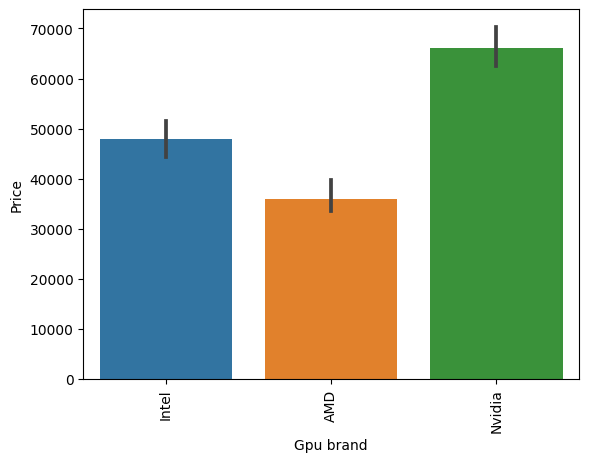

In [67]:
sns.barplot(x=lp_predict['Gpu brand'],y=lp_predict['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
lp_predict.drop(columns=['Gpu'],inplace=True)

In [69]:
lp_predict.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [70]:
lp_predict['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

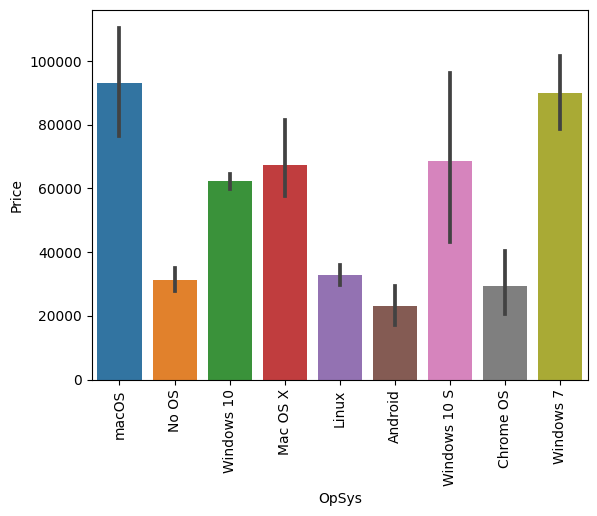

In [71]:
sns.barplot(x=lp_predict['OpSys'],y=lp_predict['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [73]:
lp_predict['os'] = lp_predict['OpSys'].apply(cat_os)

In [74]:
lp_predict.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
754,Asus,Notebook,4,Windows 10,2.37,45282.6720,0,0,100.454670,Intel Core i7,0,256,Intel,Windows
328,HP,Ultrabook,8,Windows 10,1.26,71128.8000,0,0,176.232574,Intel Core i7,0,256,Intel,Windows
35,Lenovo,Notebook,4,Windows 10,1.44,13266.7200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1221,MSI,Gaming,8,Windows 10,2.20,78647.1408,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
415,Dell,Notebook,4,Linux,2.30,31909.3920,0,0,141.211998,Intel Core i5,0,256,AMD,Others/No OS/Linux


In [75]:
lp_predict.drop(columns=['OpSys'],inplace=True)

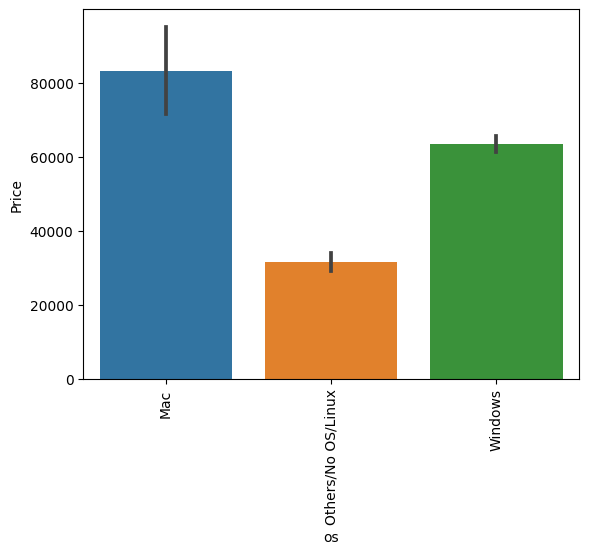

In [76]:
sns.barplot(x=lp_predict['os'],y=lp_predict['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\TANAK\AppData\Local\Temp\ipykernel_22376\1609708348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lp_predict['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

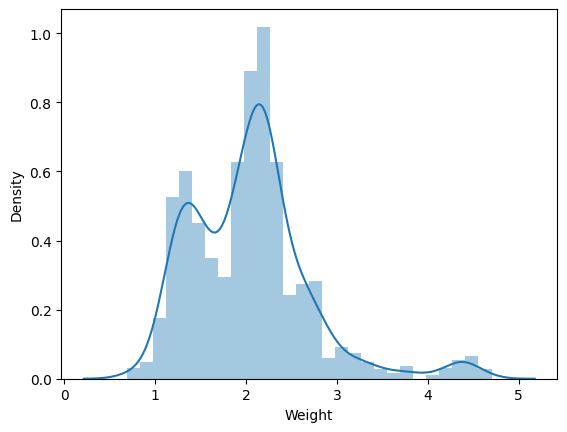

In [77]:
sns.distplot(lp_predict['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

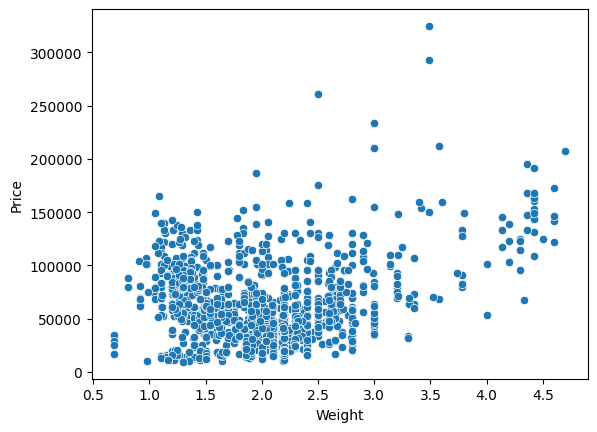

In [78]:
sns.scatterplot(x=lp_predict['Weight'],y=lp_predict['Price'])

In [79]:
lp_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   IPS          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu Brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [80]:
cols=['Price', 'Ram', 'Weight', 'Touchscreen', 'IPS', 'ppi', 'HDD', 'SSD']
correlations = lp_predict[cols].corr()

In [81]:
price_corr = correlations['Price']

In [82]:
price_corr

Price          1.000000
Ram            0.742905
Weight         0.209867
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

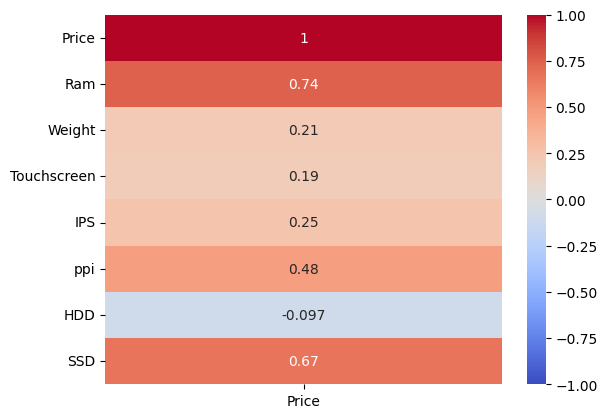

In [83]:
sns.heatmap(price_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#The to_frame() method is used to convert the Series into a DataFrame format, which the heatmap function prefers.
#annot = True is to annotate each cell with its numeric value.
#The cmap parameter specifies the color map
#vmin and vmax parameters ensure the color scaling is between -1 (full negative correlation) and 1 (full positive correlation).

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


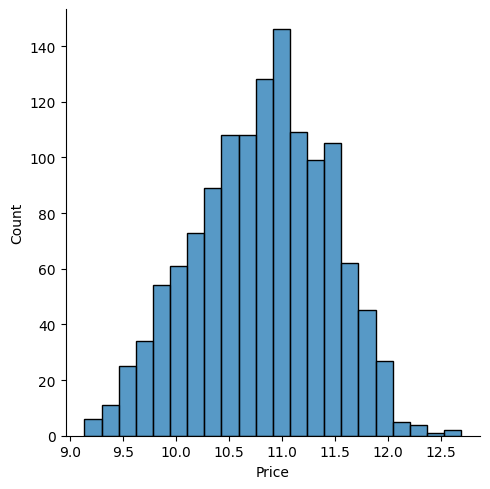

In [84]:
#np.log() is a function from the NumPy library in Python that computes the natural logarithm 
#Taking the logarithm can help linearize relationships, stabilize variances, or make the data conform more closely to the assumptions of a particular algorithm.
sns.displot(np.log(lp_predict['Price']))

In [85]:
X = lp_predict.drop(columns=['Price'])
y = np.log(lp_predict['Price'])

In [86]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [87]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [89]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [90]:
y_train

183     10.651384
1141    11.016798
1049     9.638174
1020    10.655148
878     10.791749
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1193    11.034319
Name: Price, Length: 1106, dtype: float64

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [92]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

In [93]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
#ColumnTransformer is being used to apply transformers to specific columns of a DataFrame.
#encoder is used to convert categorical data into a format that can be provided to machine learning algorithms to train
step2 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
#100 tress in the forest
#50% of dataset
#75% of features
pipe = Pipeline([('step1',step1), ('step2',step2)])
#pipeline encapsulate both pre-processing and modeling steps.
#The steps in the pipeline are executed in sequence.
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
# predicts the target variable for the X_test dataset using the trained model and stores the predictions in y_pred

#two metrics are calculated to evaluate the model's performance:
print('R2 score',r2_score(y_test,y_pred))#It provides an indication of goodness of fit.
print('MAE',mean_absolute_error(y_test,y_pred))#represent the average of the absolute differences of predicted and actual values
#it provides the idea of how wrong the predictions were

R2 score 0.8873402378382488
MAE 0.15860130110457718


In [94]:
step1 = ColumnTransformer(transformers=[ ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100, random_state=3,bootstrap=True, max_features=0.75, max_depth=15)

pipe = Pipeline([ ('step1',step1), ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
#y_pred = pipe.predict(X_test) is making predictions on the test dataset X_test using the previously defined pipeline pipe.

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8855517589132932
MAE 0.15799654683982242


In [95]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)
#gradient-boosted regression tree model.
#500 trees will be built
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8836306376455383
MAE 0.15901391745052051


In [96]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
#45 trees or boosting rounds 
#0.5 is the step size which determines the step at which the model adjusts based on the outcome of each boosting round
#The default value is usually set to 0.1, so setting it to 0.5 makes the model learn faster
pipe = Pipeline([('step1',step1), ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8811773435850243
MAE 0.16496203512600974


In [97]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])
#it will ensemble every individual regressor
#weight assigns weights to each regressor's prediction when averaging for the final prediction. 
#In this case, the prediction of the rf regressor is given 5 times the importance of each of the other regressors.
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8905562437944563
MAE 0.15807896624822848


In [98]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')


estimators = [ ('rf', RandomForestRegressor(n_estimators=350,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=15)),
               ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
               ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)),
               ('et', ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=10))
             ]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))
#ensemble method where the predictions from multiple models (often called the "base" or "level-0" models) are used as input for another model (called the "meta-model" or "level-1" model) to make a final prediction.
#This is used to combine the strengths of different models to improve the overall performance.
pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8867641032776136
MAE 0.1630138117431839


In [99]:
import pickle
#The pickle module in Python is used for serializing and deserializing Python objects.
#Serialization means converting a Python object into a byte stream, and deserialization is the inverse operation.
pickle.dump(lp_predict,open('lp_predict.pkl','wb'))#saving data
pickle.dump(pipe,open('pipe.pkl','wb'))#saving the pipeline

In [100]:
lp_predict

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [101]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux
